In [745]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf

In [746]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
...                          "bar", "bar", "bar", "bar"],
...                    "B": ["one", "one", "one", "two", "two",
...                          "one", "one", "two", "two"],
...                    "C": ["small", "large", "large", "small",
...                          "small", "large", "small", "small",
...                          "large"],
...                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
...                    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

df.head()

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6


In [747]:
pivot_table = df.pivot_table(index=["A", "B"], 
                    values=["D", "E"], columns = "C", aggfunc=np.sum, 
                                fill_value=0.0)
pivot_table

D           E      
C       large small large small
A   B                          
bar one     4     5     6     8
    two     7     6     9     9
foo one     4     1     9     2
    two     0     6     0    11

<Axes: >

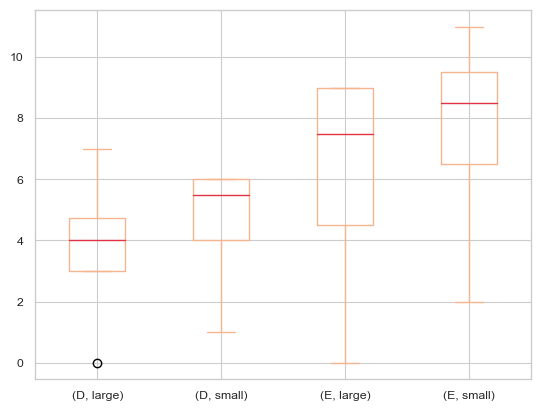

In [748]:
pivot_table.plot.box()

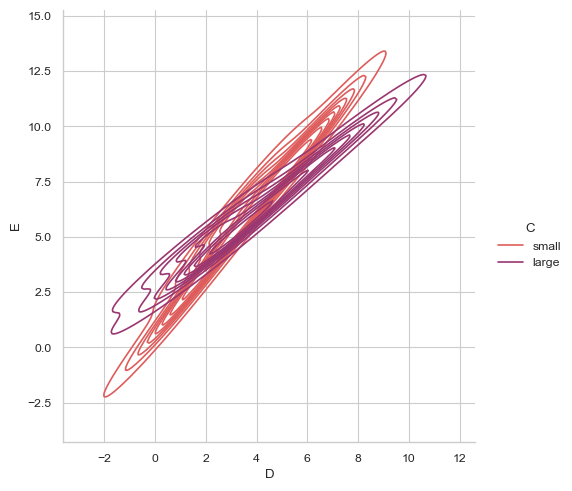

In [749]:
sns.displot(data=df, x="D", y="E", kind="kde", hue='C', palette='flare')
plt.show()

<Axes: xlabel='None-C', ylabel='None-C'>

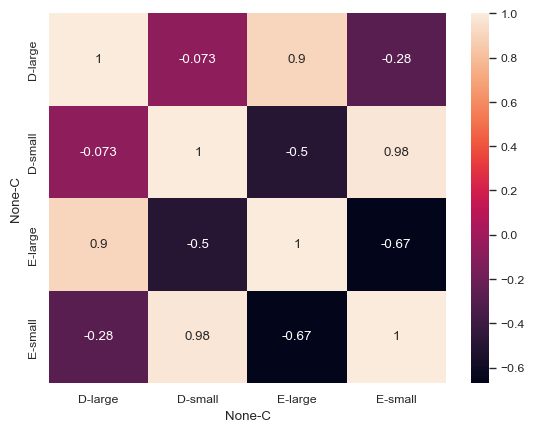

In [750]:
correlation = pivot_table.corr()

sns.set_palette('rocket_r')
sns.heatmap(data=correlation, annot=True)

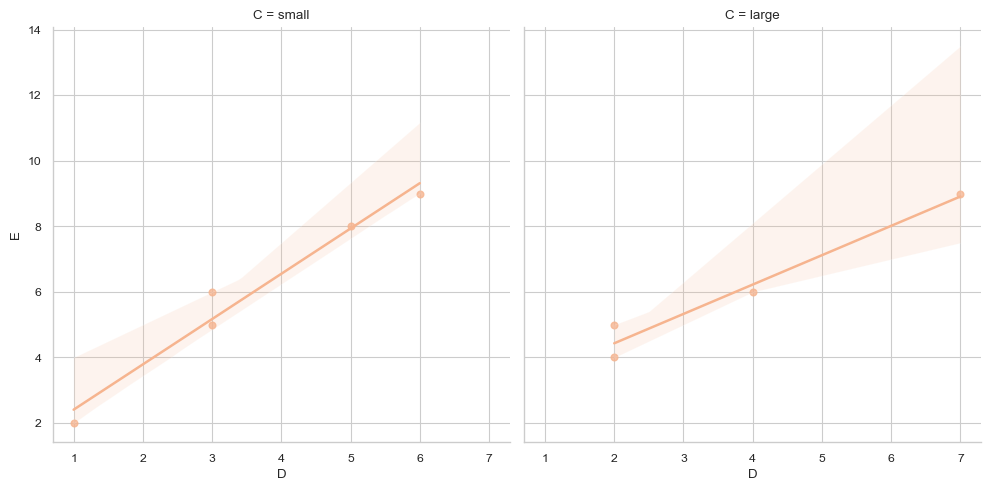

In [751]:
sns.lmplot(data=df,
            x="D",
            y="E",
            col="C")

plt.show()

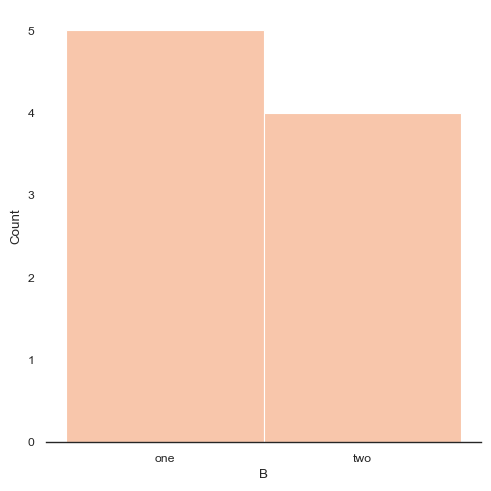

In [752]:
sns.set_style('white')
sns.displot(df['B'])
sns.despine(left=True)

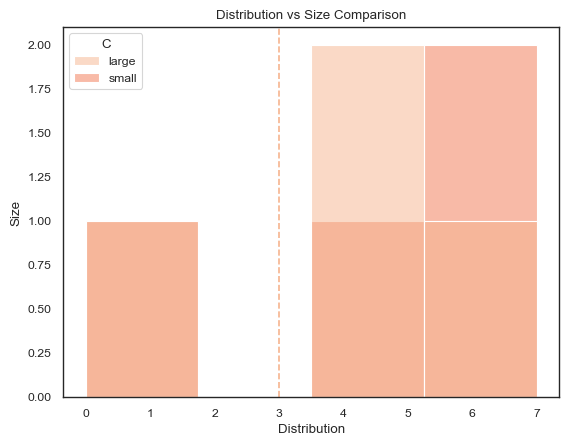

In [753]:
fig, ax = plt.subplots()

sns.histplot(pivot_table['D'], ax=ax)
ax.set(xlabel='Distribution',
        ylabel='Size',
        title='Distribution vs Size Comparison',
        )
ax.axvline(x=3, label='Mean', linestyle='--')

plt.show()

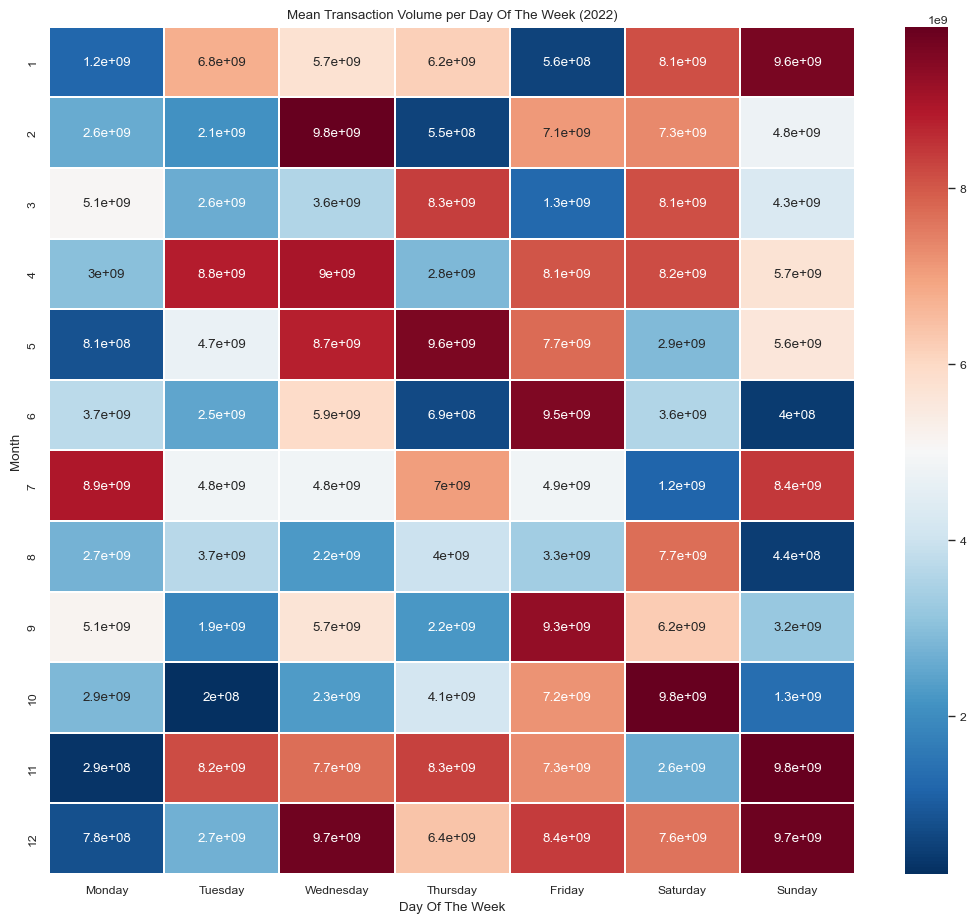

In [754]:
months = list(range(1, 13))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

transaction_data_1 = {
    'Month': [],
    'Day': [],
    'Volume': []
}

for month in months:
    for day in days:
        transaction_data_1['Month'].append(month)
        transaction_data_1['Day'].append(day)
        transaction_data_1['Volume'].append(np.random.randint(100_000_000, 10_000_000_000))

cross_tab = pd.crosstab(transaction_data_1['Month'], transaction_data_1['Day'], 
                        values=transaction_data_1['Volume'], aggfunc='mean')

cross_tab.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cross_tab.index.name = 'Month'

cross_tab.sort_values(by='Month', ascending=True)

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(13, 11))
ax = sns.heatmap(
                data=cross_tab,
                annot=True, 
                cmap='RdBu_r',
                linewidths=0.1
                )

ax.set(xlabel='Day Of The Week',
        ylabel = 'Month',
        title='Mean Transaction Volume per Day Of The Week (2022)',
        alpha=0)


plt.show()

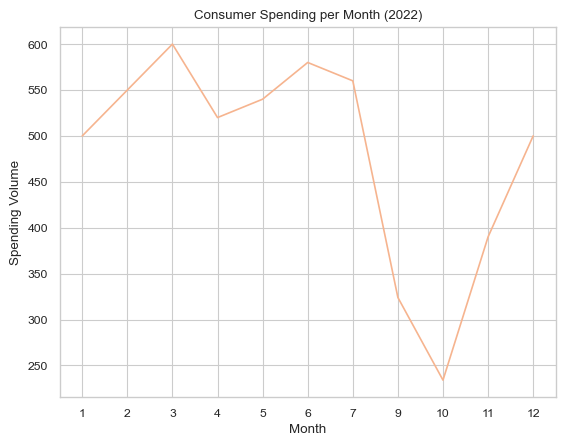

In [755]:
data = {
    'month': ['1', '2', '3', '4', '5', '6', '7', '9', '10', '11', '12'],
    'consumer_spending': [500, 550, 600, 520, 540, 580, 560, 324, 234, 390, 500],
    'interest_rate': [4.5, 4.4, 4.2, 4.3, 4.1, 4.0, 4.2, 3.8, 3.9, 4.0, 4.1]
}

to_df = pd.DataFrame(data)

sns.set_context('paper')
sns.set_style('whitegrid')
ax = sns.lineplot(data=to_df, x='month', y='consumer_spending')
ax.set(xlabel='Month',
        ylabel='Spending Volume',
        title='Consumer Spending per Month (2022)')
plt.show()

In [756]:

# Mapping of clients to business categories
categories = ['Retail', 'Food & Beverage', 'Beauty Services', 'Supermarkets & Food services', 'Clothing', 'Others']

transaction_data = { 
    'cat' : [],
    'vol' : []
}

for category in categories: 
    transaction_data['cat'].append(category)
    transaction_data['vol'].append(np.random.randint(100_000_000, 200_000_000))

volume_per_cat = pd.DataFrame(transaction_data)
volume_per_cat

,cat,vol
0,Retail,155051186
1,Food & Beverage,170854297
2,Beauty Services,102321084
3,Supermarkets & Food services,109865888
4,Clothing,185230682
5,Others,107519334


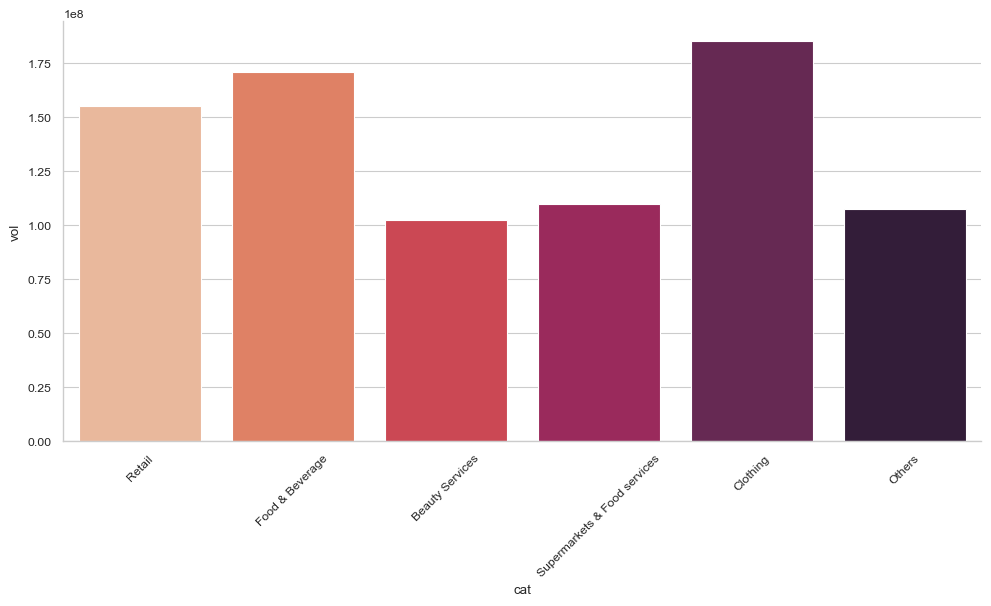

In [757]:

ax = sns.catplot(data=volume_per_cat, x='cat', y='vol', kind='bar', aspect=2)
ax.set_xticklabels(rotation=45)

In [761]:
tickers = ["STNE", "CIEL3.SA", "PAGS"]
stone_data = yf.download(tickers, 
                    start="2022-01-01",
                    end = "2022-12-31",
                    interval = "1wk",
                    prepost = False,
                    repair = True)

stone_df = pd.DataFrame(stone_data)
stone_df.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                          Close                         
            CIEL3.SA       PAGS       STNE CIEL3.SA       PAGS       STNE   
Date                                                                        
2022-01-01  1.825136  23.700001  16.120001     2.05  23.700001  16.120001  \
2022-01-08  1.798426  22.450001  16.620001     2.02  22.450001  16.620001   
2022-01-15  1.842942  20.740000  14.460000     2.07  20.740000  14.460000   
2022-01-22  2.029907  20.870001  14.660000     2.28  20.870001  14.660000   
2022-01-29  2.074422  17.889999  13.410000     2.33  17.889999  13.410000   

               High                            Low  ...            Open   
           CIEL3.SA       PAGS       STNE CIEL3.SA  ...   STNE CIEL3.SA   
Date                                                ...                   
2022-01-01     2.29  28.680000  19.660000     2.01  ...  15.32     2.27  \
2022-01-08     2.11  25.233000  18.150000     1.99  ...  15.21     2.05   
2022-01-15     2.15  22.629999  16.430000     2.01  ...  14.41     2.02   
2022-01-22     2.31  22.500000  15.820000     2.01  ...  13.14     2.06   
2022-01-29     2.45  23.290001  16.280001     2.18  ...  12.55     2.28   

                                 Repaired?                   Volume             
                 PAGS       STNE  CIEL3.SA   PAGS   STNE   CIEL3.SA      PAGS   
Date                                                                            
2022-01-01  26.480000  17.059999     False  False  False  103437300  16868800  \
2022-01-08  23.240000  16.070000     False  False  False  112272200   9034400   
2022-01-15  21.889999  16.219999     False  False  False  159852200  10174800   
2022-01-22  19.940001  13.810000     False  False  False  189541100  13726400   
2022-01-29  20.570000  14.580000     False  False  False  231533700  26912100   

                      
                STNE  
Date                  
2022-01-01  38602600  
2022-01-08  24051600  
2022-01-15  25535900  
2022-01-22  29470100  
2022-01-29  32257500  

[5 rows x 21 columns]

[Text(0.5, 0, 'Ticker'),
 Text(0, 0.5, 'Closing Price Range'),
 Text(0.5, 1.0, 'Acquiring Companies Closing Price Range (2022)')]

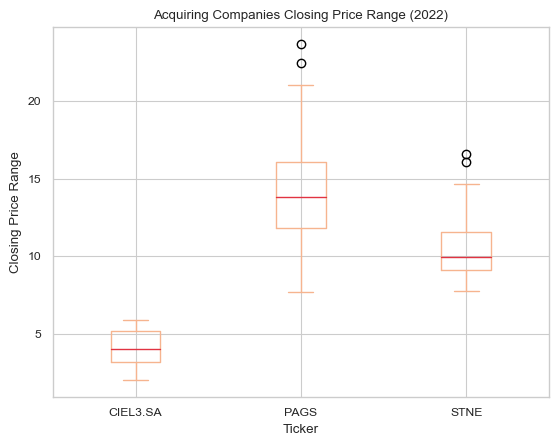

In [764]:
ax = stone_df['Close'].plot.box()
ax.set(xlabel="Ticker", ylabel="Closing Price Range", title="Acquiring Companies Closing Price Range (2022)")

[*********************100%***********************]  3 of 3 completed


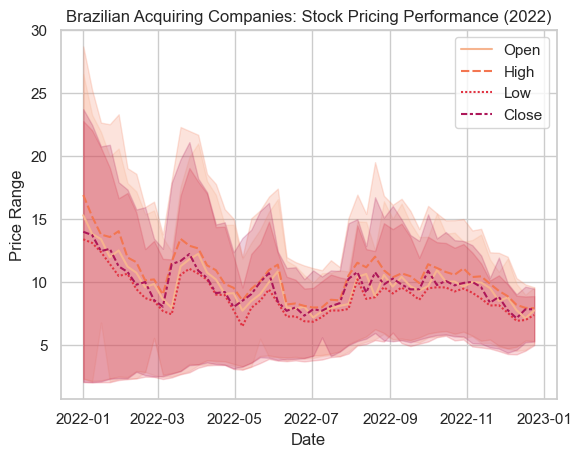

In [779]:
tickers = ["STNE", "CIEL3.SA", "PAGS"]
acquirers_data = yf.download(tickers, 
                start="2022-01-01",
                end = "2022-12-31",
                interval = "1wk",
                prepost = False,
                repair = True)

acquirers = pd.DataFrame(acquirers_data)

base_to_see = acquirers[['Open', 'High', 'Low', 'Close']]

sns.set_style('whitegrid')
sns.set_context('notebook')

ax = sns.lineplot(data=base_to_see)
ax.set(ylabel="Price Range", 
        title="Brazilian Acquiring Companies: Stock Pricing Performance (2022)" )
plt.show()